In [1]:
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np


In [2]:
ANCODEA29=[]
with open('ANCODE_A29.txt',"r") as f:
   for l in f:
       print (l.strip().split("\t"))
       ANCODEA29.append(l.strip().split("\t"))
ANCODEA29[0][1]

['0.188680000000000', '0.108700000000000', '0.0716850000000000', '0.0455790000000000', '0.0391080000000000', '0.0302020000000000', '0.0258670000000000', '0.0237760000000000', '0.0165650000000000', '0.0108440000000000', '0.00411130000000000', '0.00194650000000000', '0.00101010000000000', '0.000353100000000000', '0.000137520000000000', '5.32090000000000e-05', '1.84480000000000e-05', '3.37010000000000e-06', '1.06780000000000e-06', '7.00000000000000e-08']


'0.108700000000000'

In [3]:
Hammingcode74=[]
with open('hammmingcode_74.txt',"r") as f:
   for l in f:
       print (l.strip().split("\t"))
       Hammingcode74.append(l.strip().split("\t"))
Hammingcode74[0][1]

['0.104170000000000', '0.0844590000000000', '0.0782210000000000', '0.0609900000000000', '0.0494070000000000', '0.0418060000000000', '0.0262750000000000', '0.0203920000000000', '0.0154130000000000', '0.0118880000000000', '0.00625150000000000', '0.00354630000000000', '0.00199830000000000', '0.00116490000000000', '0.000494110000000000', '0.000250410000000000', '0.000110150000000000', '5.10000000000000e-05', '2.20000000000000e-05', '1.20000000000000e-05', '4.00000000000000e-06']


'0.0844590000000000'

In [4]:
uncode=[]
with open('uncode.txt',"r") as f:
   for l in f:
       print (l.strip().split("\t"))
       uncode.append(l.strip().split("\t"))
uncode[0][1]

['0.0801280000000000', '0.0703730000000000', '0.0619200000000000', '0.0489720000000000', '0.0399840000000000', '0.0318670000000000', '0.0259810000000000', '0.0191280000000000', '0.0137140000000000', '0.0102180000000000', '0.00640200000000000', '0.00406260000000000', '0.00211460000000000', '0.00110730000000000', '0.000692120000000000', '0.000413340000000000', '0.000194600000000000', '9.70000000000000e-05', '3.40000000000000e-05', '1.00000000000000e-05', '3.00000000000000e-06', '1.00000000000000e-06']


'0.0703730000000000'

In [5]:
uncode[0][1]
Hammingcode74[0][1]
ANCODEA29[0][1]
print(len(uncode[0]),len(Hammingcode74[0]),len(ANCODEA29[0]))
uncode =np.asarray([float(ele) for ele in  (uncode[0])])
Hammingcode74=np.asarray([float(ele) for ele in  (Hammingcode74[0])])
ANCODEA29=np.asarray([float(ele) for ele in  (ANCODEA29[0])])


22 21 20


In [6]:
#most fit line
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import math
from matplotlib.pyplot import figure
ebno =np.asarray([0.5*idx for idx in range(20)])
#ANCODE 29 log line
ANCODEA29_log = np.asarray([math.log10(ele) for ele in ANCODEA29 ])
e=1.1
e2=1.8
def exp_1(x,a,b,c,d,a1,b1,c1,d1):

    return a*e**((-((x*b)**c))/d)+a1*e2**((-((x*b1)**c1))/d1)
param, param_cov = curve_fit(exp_1,ebno,ANCODEA29_log[0:20],maxfev=int(1e7))
exp_fun = param[0]*(e)**((-((ebno*param[1])**param[2]))/param[3])+\
            param[4]*(e2)**((-((ebno*param[5])**param[6]))/param[7])
#UNCODE log Line
uncode_log =np.asarray([np.log10(ele) for ele in uncode])
e_uncode=2.719
e2_uncode=2
def exp_uncode(x,a,b,c,d,a1,b1,c1,d1):

    return a*e_uncode**((-((x*b)**c))/d)+a1*e2_uncode**((-((x*b1)**c1))/d1)
param_uncode_log, param_cov = curve_fit(exp_uncode,ebno,uncode_log[0:20],maxfev=int(1e7))
exp_fun_uncode = param_uncode_log[0]*(e_uncode)**((-((ebno*param_uncode_log[1])**param_uncode_log[2]))/param_uncode_log[3])+\
        param_uncode_log[4]*(e2_uncode)**((-((ebno*param_uncode_log[5])**param_uncode_log[6]))/param_uncode_log[7])
#HAMMING LOG LINE
hamming_log = np.asarray([math.log10(ele) for ele in Hammingcode74[0:20]])
e_hamming=1.25
e2_hamming=1.13
def exp_hamming(x,a,b,c,d,a1,b1,c1,d1):

    return a*e_hamming**((-((x*b)**c))/d)+a1*e2_hamming**((-((x*b1)**c1))/d1)
param_hamming, param_hamming_cov = curve_fit(exp_hamming,ebno,hamming_log[0:20], maxfev = int(1e6))
exp_fun_hamming = param_hamming[0]*(e_hamming)**((-((ebno*param_hamming[1])**param_hamming[2]))/param_hamming[3])+\
            param_hamming[4]*(e_hamming)**((-((ebno*param_hamming[5])**param_hamming[6]))/param_hamming[7])






<ipython-input-6-155ce3866a0b>:13: RuntimeWarning: invalid value encountered in power
  return a*e**((-((x*b)**c))/d)+a1*e2**((-((x*b1)**c1))/d1)
<ipython-input-6-155ce3866a0b>:13: RuntimeWarning: divide by zero encountered in power
  return a*e**((-((x*b)**c))/d)+a1*e2**((-((x*b1)**c1))/d1)
<ipython-input-6-155ce3866a0b>:13: RuntimeWarning: overflow encountered in power
  return a*e**((-((x*b)**c))/d)+a1*e2**((-((x*b1)**c1))/d1)
c:\Users\E411_71\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-6-155ce3866a0b>:16: RuntimeWarning: divide by zero encountered in power
  param[4]*(e2)**((-((ebno*param[5])**param[6]))/param[7])
<ipython-input-6-155ce3866a0b>:23: RuntimeWarning: divide by zero encountered in power
  return a*e_uncode**((-((x*b)**c))/d)+a1*e2_uncode**((-((x*b1)**c1))/d1)
<ipython-input-6-155ce3866a0b>:23: RuntimeW

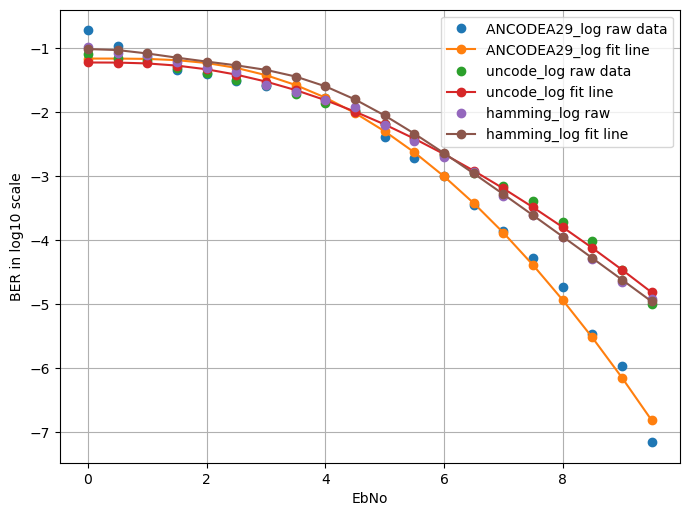

In [7]:

figure(figsize=(8, 6), dpi=100)
#ANCODE PLOT
plt.plot(ebno,ANCODEA29_log[0:20],'o',label='ANCODEA29_log raw data')
plt.plot(ebno,exp_fun,'-o',label='ANCODEA29_log fit line ')
#UNCODE PLOT
plt.plot(ebno,uncode_log[0:20],'o',label='uncode_log raw data')
plt.plot(ebno,exp_fun_uncode,'-o',label='uncode_log fit line ')
#HAMMINGCODE PLOT
plt.plot(ebno,hamming_log[0:20],'o',label='hamming_log raw')
plt.plot(ebno,exp_fun_hamming,'-o',label='hamming_log fit line')

plt.xlabel('EbNo')
plt.ylabel('BER in log10 scale')
plt.grid()
plt.legend()

In [8]:
exp_fun_hammin_extend

NameError: name 'exp_fun_hammin_extend' is not defined

In [ ]:
ebno_extend[10],exp_fun_hammin_extend[10]

(5.0, -2.053366063401152)

<ipython-input-13-85c630e562ea>:4: RuntimeWarning: divide by zero encountered in power
  param[4]*(e2)**((-((ebno_extend*param[5])**param[6]))/param[7])
<ipython-input-13-85c630e562ea>:5: RuntimeWarning: divide by zero encountered in power
  exp_fun_hammin_extend = param_hamming[0]*(e_hamming)**((-((ebno_extend*param_hamming[1])**param_hamming[2]))/param_hamming[3])+\
<ipython-input-13-85c630e562ea>:7: RuntimeWarning: divide by zero encountered in power
  exp_fun_uncode_extend = param_uncode_log[0]*(e_uncode)**((-((ebno_extend*param_uncode_log[1])**param_uncode_log[2]))/param_uncode_log[3])+\


5.85600898517734
2269712.5069036605


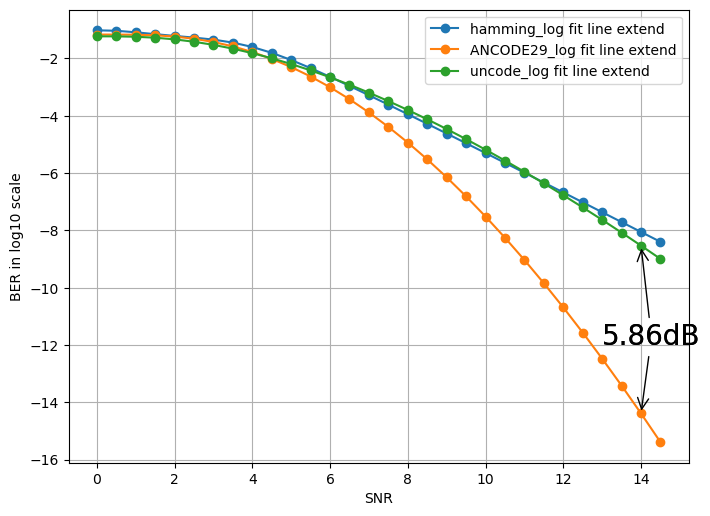

In [13]:
ebno_extend =np.asarray([0.5*idx for idx in range(30)])

exp_fun_extend = param[0]*(e)**((-((ebno_extend*param[1])**param[2]))/param[3])+\
            param[4]*(e2)**((-((ebno_extend*param[5])**param[6]))/param[7])
exp_fun_hammin_extend = param_hamming[0]*(e_hamming)**((-((ebno_extend*param_hamming[1])**param_hamming[2]))/param_hamming[3])+\
            param_hamming[4]*(e_hamming)**((-((ebno_extend*param_hamming[5])**param_hamming[6]))/param_hamming[7])
exp_fun_uncode_extend = param_uncode_log[0]*(e_uncode)**((-((ebno_extend*param_uncode_log[1])**param_uncode_log[2]))/param_uncode_log[3])+\
        param_uncode_log[4]*(e2_uncode)**((-((ebno_extend*param_uncode_log[5])**param_uncode_log[6]))/param_uncode_log[7])
figure(figsize=(8, 6), dpi=100)
plt.plot(ebno_extend,exp_fun_hammin_extend,'-o',label='hamming_log fit line extend')
plt.plot(ebno_extend,exp_fun_extend,'-o',label='ANCODE29_log fit line extend')
plt.plot(ebno_extend,exp_fun_uncode_extend,'-o',label='uncode_log fit line extend')
plt.grid()
plt.xlabel('SNR')
plt.ylabel('BER in log10 scale')

y_temp=-12
x_temp=13
diff = exp_fun_uncode_extend[28] -exp_fun_extend[28]
print(diff)
tx_on_plot=""+str(round(diff, 2))+"dB"
#Two arrow line
plt.annotate(tx_on_plot,xy=(ebno_extend[28],exp_fun_uncode_extend[28]),\
        xytext=(x_temp,y_temp),arrowprops={
                'arrowstyle':'->'
           } ,fontsize=20)
plt.annotate(tx_on_plot,xy=(ebno_extend[28],exp_fun_extend[28]),\
        xytext=(x_temp,y_temp),arrowprops={
                'arrowstyle':'->'
           } ,fontsize=20)
# text
diff_in_log =10**(diff)*3.162
diff_in_log_txt =tx_on_plot+"  = "+str(round(diff_in_log, 2))
# plt.text(2,-12,diff_in_log_txt,{'fontsize':18})
plt.legend()
print(diff_in_log)

In [637]:
pp

<ipython-input-610-213114dbb770>:12: RuntimeWarning: invalid value encountered in power
  return a*e**((-((x*b)**c))/d)+a1*e2**((-((x*b1)**c1))/d1)
<ipython-input-610-213114dbb770>:12: RuntimeWarning: divide by zero encountered in power
  return a*e**((-((x*b)**c))/d)+a1*e2**((-((x*b1)**c1))/d1)
<ipython-input-610-213114dbb770>:12: RuntimeWarning: overflow encountered in power
  return a*e**((-((x*b)**c))/d)+a1*e2**((-((x*b1)**c1))/d1)
c:\Users\E411_71\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-610-213114dbb770>:15: RuntimeWarning: divide by zero encountered in power
  param[4]*(e2)**((-((ebno*param[5])**param[6]))/param[7])


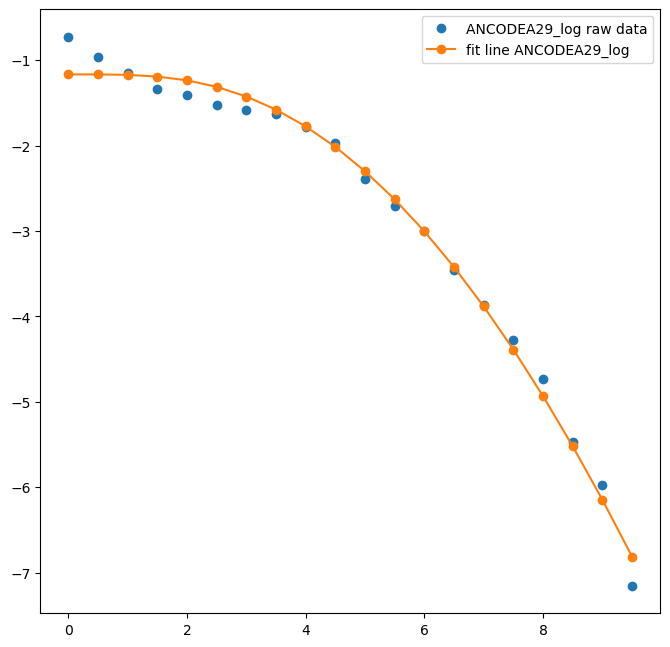

In [610]:
#most fit line
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import math
from matplotlib.pyplot import figure
ebno =np.asarray([0.5*idx for idx in range(20)])
ANCODEA29_log = np.asarray([math.log10(ele) for ele in ANCODEA29 ])
e=1.1
e2=1.8
def exp_1(x,a,b,c,d,a1,b1,c1,d1):

    return a*e**((-((x*b)**c))/d)+a1*e2**((-((x*b1)**c1))/d1)
param, param_cov = curve_fit(exp_1,ebno,ANCODEA29_log[0:20],maxfev=int(1e7))
exp_fun = param[0]*(e)**((-((ebno*param[1])**param[2]))/param[3])+\
            param[4]*(e2)**((-((ebno*param[5])**param[6]))/param[7])

figure(figsize=(8, 8), dpi=100)
plt.plot(ebno,ANCODEA29_log[0:20],'o',label='ANCODEA29_log raw data')
plt.plot(ebno,exp_fun,'-o',label='fit line ANCODEA29_log')
plt.legend()


In [172]:
ebno =np.asarray([0.5*idx for idx in range(20)])

<ipython-input-401-e2472d051723>:10: RuntimeWarning: divide by zero encountered in power
  return a*e**((-((x*b)**c))/d)+a1*e2**((-((x*b1)**c1))/d1)


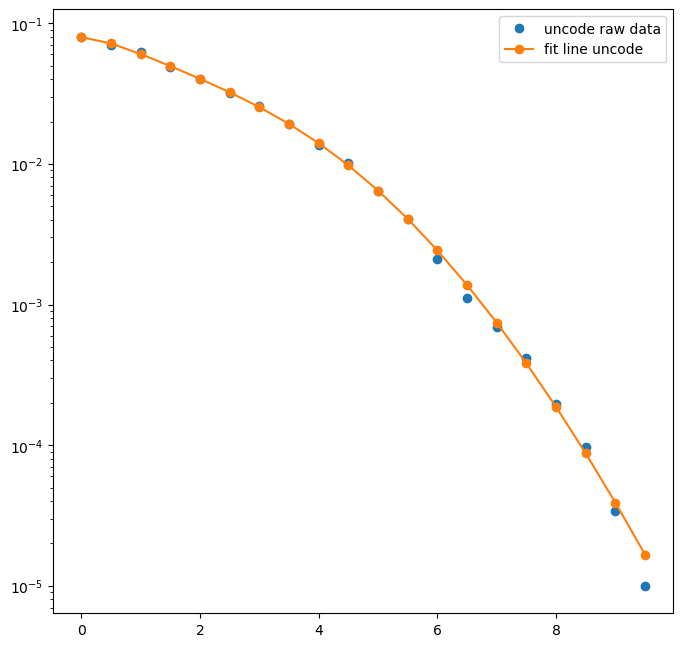

In [401]:
#most fit line
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import math
from matplotlib.pyplot import figure

e_uncode=2.719
e2_uncode=2
def exp_uncode(x,a,b,c,d,a1,b1,c1,d1):

    return a*e_uncode**((-((x*b)**c))/d)+a1*e2_uncode**((-((x*b1)**c1))/d1)
param_uncode, param_uncode_cov = curve_fit(exp_uncode,ebno,uncode[0:20],maxfev=int(1e7))
exp_fun_uncode = param_uncode[0]*(e_uncode)**((-((ebno*param_uncode[1])**param_uncode[2]))/param_uncode[3])+\
        param_uncode[4]*(e2_uncode)**((-((ebno*param_uncode[5])**param_uncode[6]))/param_uncode[7])


figure(figsize=(8, 8), dpi=100)
plt.plot(ebno,uncode[0:20],'o',label='uncode raw data')
plt.plot(ebno,exp_fun_uncode,'-o',label='fit line uncode')
plt.legend()
plt.yscale('log')

<ipython-input-611-35239adcef84>:11: RuntimeWarning: divide by zero encountered in power
  return a*e**((-((x*b)**c))/d)+a1*e2**((-((x*b1)**c1))/d1)
<ipython-input-611-35239adcef84>:11: RuntimeWarning: invalid value encountered in power
  return a*e**((-((x*b)**c))/d)+a1*e2**((-((x*b1)**c1))/d1)
c:\Users\E411_71\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-611-35239adcef84>:13: RuntimeWarning: divide by zero encountered in power
  exp_fun_uncode = param_uncode_log[0]*(e)**((-((ebno*param_uncode_log[1])**param_uncode_log[2]))/param_uncode_log[3])+\


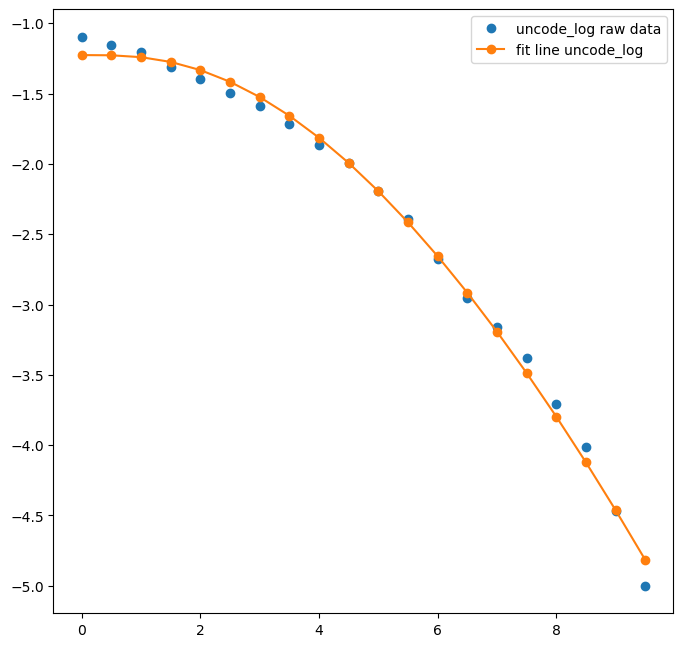

In [611]:
#most fit log line
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import math
from matplotlib.pyplot import figure
uncode_log =np.asarray([np.log10(ele) for ele in uncode])
e_uncode=2.719
e2_uncode=2
def exp_uncode(x,a,b,c,d,a1,b1,c1,d1):

    return a*e_uncode**((-((x*b)**c))/d)+a1*e2_uncode**((-((x*b1)**c1))/d1)
param_uncode_log, param_cov = curve_fit(exp_uncode,ebno,uncode_log[0:20],maxfev=int(1e7))
exp_fun_uncode = param_uncode_log[0]*(e_uncode)**((-((ebno*param_uncode_log[1])**param_uncode_log[2]))/param_uncode_log[3])+\
        param_uncode_log[4]*(e2_uncode)**((-((ebno*param_uncode_log[5])**param_uncode_log[6]))/param_uncode_log[7])


figure(figsize=(8, 8), dpi=100)
plt.plot(ebno,uncode_log[0:20],'o',label='uncode_log raw data')
plt.plot(ebno,exp_fun_uncode,'-o',label='fit line uncode_log')
plt.legend()


<ipython-input-555-50e747c4a929>:10: RuntimeWarning: overflow encountered in power
  return a*e**((-((x*b)**c))/d)+a1*e2**((-((x*b1)**c1))/d1)
<ipython-input-555-50e747c4a929>:10: RuntimeWarning: divide by zero encountered in power
  return a*e**((-((x*b)**c))/d)+a1*e2**((-((x*b1)**c1))/d1)
<ipython-input-555-50e747c4a929>:10: RuntimeWarning: invalid value encountered in power
  return a*e**((-((x*b)**c))/d)+a1*e2**((-((x*b1)**c1))/d1)


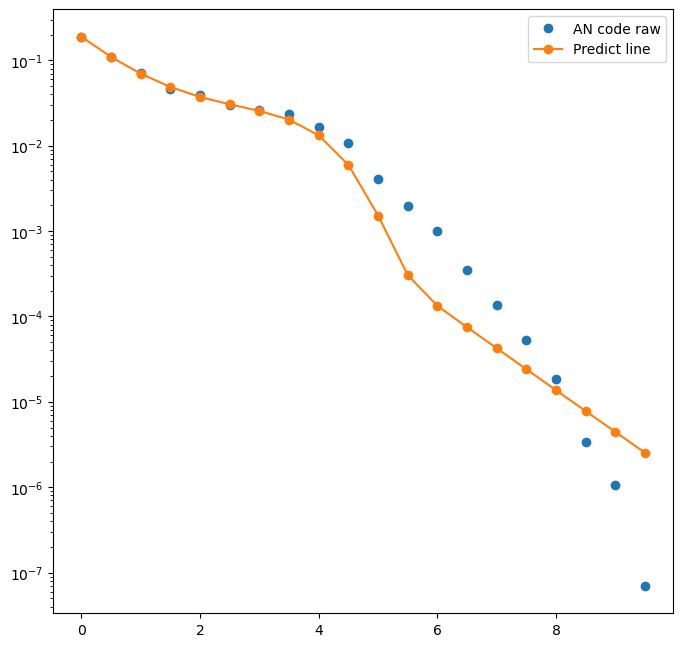

In [555]:
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import math
from matplotlib.pyplot import figure

e=30.5
e2=7
def exp_1(x,a,b,c,d,a1,b1,c1,d1):

    return a*e**((-((x*b)**c))/d)+a1*e2**((-((x*b1)**c1))/d1)
param, param_cov = curve_fit(exp_1,ebno,ANCODEA29[0:20],maxfev =int(1e6))
exp_fun = param[0]*(e)**((-((ebno*param[1])**param[2]))/param[3])+\
            param[4]*(e)**((-((ebno*param[5])**param[6]))/param[7])


figure(figsize=(8, 8), dpi=100)
plt.plot(ebno,ANCODEA29[0:20],'o',label='AN code raw')
plt.plot(ebno,exp_fun,'-o',label='Predict line')
plt.legend()
plt.yscale('log')

In [588]:
hamming_log = np.asarray([math.log10(ele) for ele in Hammingcode74[0:20]])
hamming_log

array([-0.98225734, -1.07335406, -1.10667664, -1.21474137, -1.30621152,
       -1.37876138, -1.58045728, -1.69054018, -1.81211282, -1.9248912 ,
       -2.20401576, -2.45022453, -2.69933931, -2.93371135, -3.30617636,
       -3.60134833, -3.9580155 , -4.29242982, -4.65757732, -4.92081875])

<ipython-input-617-ff334bda4849>:10: RuntimeWarning: divide by zero encountered in power
  return a*e**((-((x*b)**c))/d)+a1*e2**((-((x*b1)**c1))/d1)
<ipython-input-617-ff334bda4849>:10: RuntimeWarning: invalid value encountered in power
  return a*e**((-((x*b)**c))/d)+a1*e2**((-((x*b1)**c1))/d1)
<ipython-input-617-ff334bda4849>:10: RuntimeWarning: overflow encountered in power
  return a*e**((-((x*b)**c))/d)+a1*e2**((-((x*b1)**c1))/d1)
<ipython-input-617-ff334bda4849>:12: RuntimeWarning: divide by zero encountered in power
  exp_fun_hamming = param_hamming[0]*(e)**((-((ebno*param_hamming[1])**param_hamming[2]))/param_hamming[3])+\


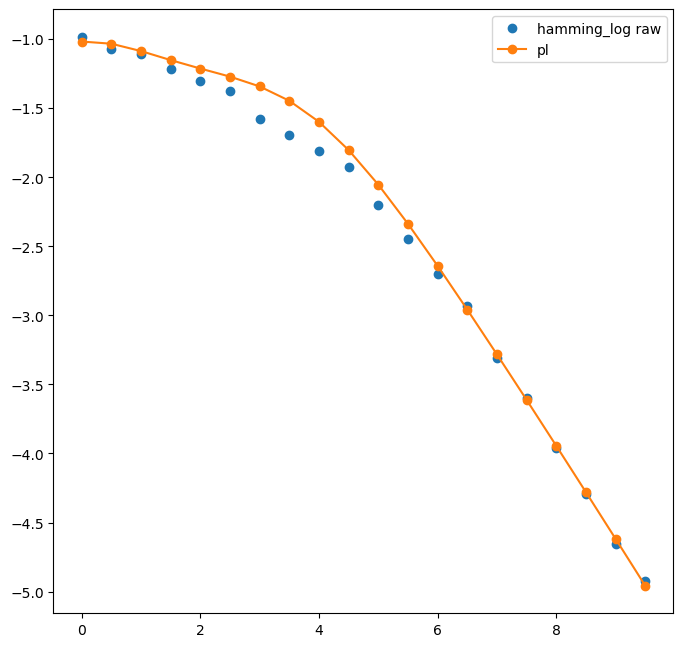

In [617]:
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import math
from matplotlib.pyplot import figure
hamming_log = np.asarray([math.log10(ele) for ele in Hammingcode74[0:20]])
e_hamming=1.25
e2_hamming=1.13
def exp_hamming(x,a,b,c,d,a1,b1,c1,d1):

    return a*e_hamming**((-((x*b)**c))/d)+a1*e2_hamming**((-((x*b1)**c1))/d1)
param_hamming, param_hamming_cov = curve_fit(exp_hamming,ebno,hamming_log[0:20], maxfev = int(1e6))
exp_fun_hamming = param_hamming[0]*(e_hamming)**((-((ebno*param_hamming[1])**param_hamming[2]))/param_hamming[3])+\
            param_hamming[4]*(e_hamming)**((-((ebno*param_hamming[5])**param_hamming[6]))/param_hamming[7])


figure(figsize=(8, 8), dpi=100)
plt.plot(ebno,hamming_log[0:20],'o',label='hamming_log raw')
plt.plot(ebno,exp_fun_hamming,'-o',label='pl')
plt.legend()


<ipython-input-381-39d902def4ff>:9: RuntimeWarning: invalid value encountered in power
  return a*e**((-((x*b)**c))/d)


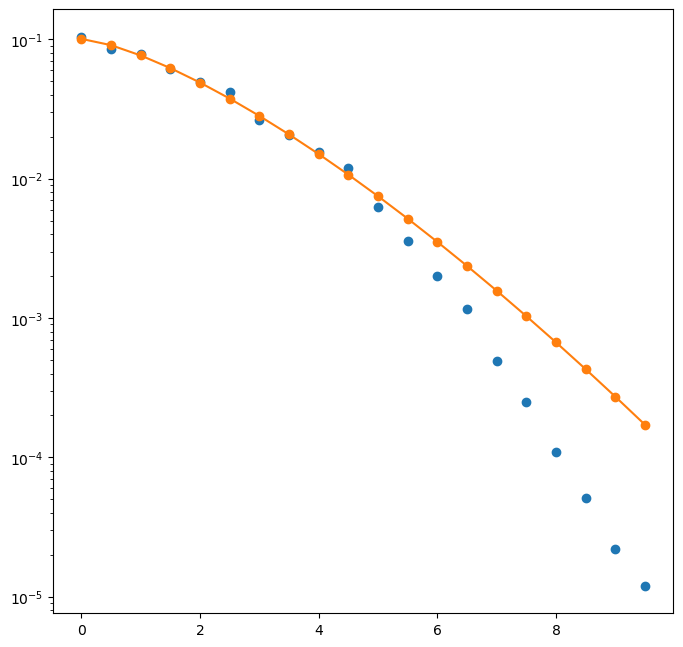

In [381]:
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import math
from matplotlib.pyplot import figure

e=2.71222
def exp_1(x,a,b,c,d):

    return a*e**((-((x*b)**c))/d)
param, param_cov = curve_fit(exp_1,ebno,Hammingcode74[0:20])
exp_fun = param[0]*(e)**((-((ebno*param[1])**param[2]))/param[3])


figure(figsize=(8, 8), dpi=100)
plt.plot(ebno,Hammingcode74[0:20],'o',label='raw')
plt.plot(ebno,exp_fun,'-o',label='pl')
plt.yscale('log')

<ipython-input-484-a7d962e08684>:11: RuntimeWarning: invalid value encountered in power
  return a*e**((-((x*b)**c))/d)+a1*e2**((-((x*b1)**c1))/d1)
<ipython-input-484-a7d962e08684>:11: RuntimeWarning: divide by zero encountered in power
  return a*e**((-((x*b)**c))/d)+a1*e2**((-((x*b1)**c1))/d1)
<ipython-input-484-a7d962e08684>:11: RuntimeWarning: overflow encountered in power
  return a*e**((-((x*b)**c))/d)+a1*e2**((-((x*b1)**c1))/d1)
c:\Users\E411_71\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


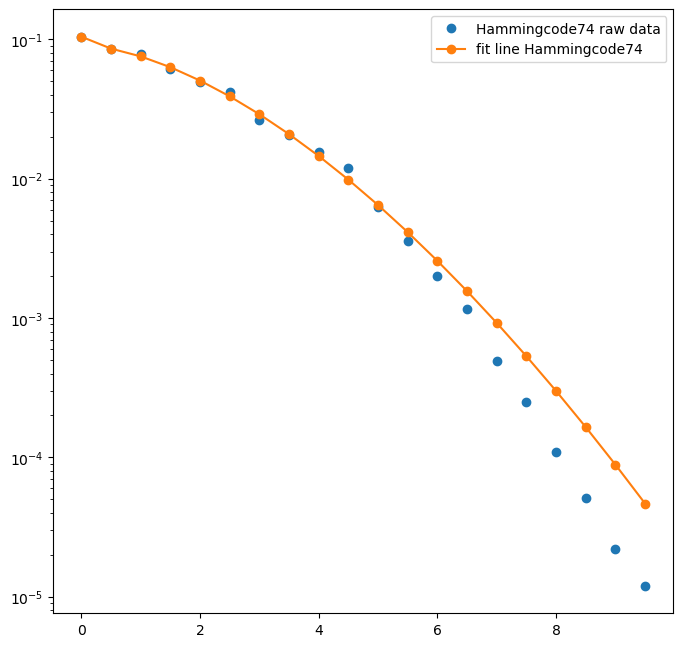

In [484]:
#hamming 74 
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import math
from matplotlib.pyplot import figure

e=10
e2=6
def exp_1(x,a,b,c,d,a1,b1,c1,d1):

    return a*e**((-((x*b)**c))/d)+a1*e2**((-((x*b1)**c1))/d1)
param, param_cov = curve_fit(exp_1,ebno,Hammingcode74[0:20],maxfev=int(1e7))
exp_fun = param[0]*(e)**((-((ebno*param[1])**param[2]))/param[3])+\
        param[4]*(e2)**((-((ebno*param[5])**(param[6])))/param[7])


figure(figsize=(8, 8), dpi=100)
plt.plot(ebno,Hammingcode74[0:20],'o',label='Hammingcode74 raw data')
plt.plot(ebno,exp_fun,'-o',label='fit line Hammingcode74')
plt.legend()
plt.yscale('log')

<ipython-input-359-01199aed3651>:9: RuntimeWarning: divide by zero encountered in power
  return a*e**((-((x*b)**c))/d)+a1*e2**((-((x*b1)**c1))/d1)
<ipython-input-359-01199aed3651>:17: RuntimeWarning: overflow encountered in power
  return a1*hamming_variable**((-((x*a2)**a3))/a4)+a5*hamming_variable**((-((x*a6)**a6))/a8)+a9*hamming_variable2**((-((x*a10)**a11))/a12)
<ipython-input-359-01199aed3651>:17: RuntimeWarning: divide by zero encountered in power
  return a1*hamming_variable**((-((x*a2)**a3))/a4)+a5*hamming_variable**((-((x*a6)**a6))/a8)+a9*hamming_variable2**((-((x*a10)**a11))/a12)
<ipython-input-359-01199aed3651>:17: RuntimeWarning: invalid value encountered in power
  return a1*hamming_variable**((-((x*a2)**a3))/a4)+a5*hamming_variable**((-((x*a6)**a6))/a8)+a9*hamming_variable2**((-((x*a10)**a11))/a12)
<ipython-input-359-01199aed3651>:17: RuntimeWarning: invalid value encountered in add
  return a1*hamming_variable**((-((x*a2)**a3))/a4)+a5*hamming_variable**((-((x*a6)**a6))/

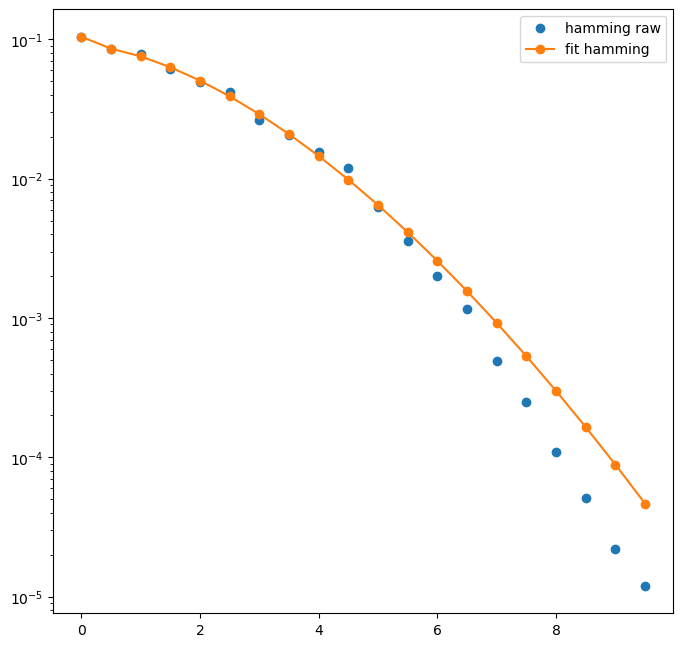

In [359]:
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import math
from matplotlib.pyplot import figure

e=2.718
e2=10
def exp_1(x,a,b,c,d,a1,b1,c1,d1):
    return a*e**((-((x*b)**c))/d)+a1*e2**((-((x*b1)**c1))/d1)
param, param_cov = curve_fit(exp_1,ebno,uncode[0:20], maxfev = int(1e7))
exp_fun = param[0]*(e)**((-((ebno*param[1])**param[2]))/param[3])+\
         param[4]*(e2)**((-((ebno*param[5])**param[6]))/param[7])

hamming_variable=6
hamming_variable2=3
def exp_hamming(x,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12):
    return a1*hamming_variable**((-((x*a2)**a3))/a4)+a5*hamming_variable**((-((x*a6)**a6))/a8)+a9*hamming_variable2**((-((x*a10)**a11))/a12)
param, param_cov = curve_fit(exp_hamming,ebno,Hammingcode74[0:20], maxfev = int(1e7))
exp_haming_fun = param[0]*(hamming_variable)**((-((ebno*param[1])**param[2]))/param[3])+\
        param[4]*(hamming_variable)**((-((ebno*param[5])**param[6]))/param[7])+\
            param[8]*(hamming_variable2)**((-((ebno*param[9])**param[10]))/param[11])


figure(figsize=(8, 8), dpi=100)
#hamming74 plot
plt.plot(ebno,Hammingcode74[0:20],'o',label='hamming raw')
plt.plot(ebno,exp_haming_fun,'-o',label='fit hamming')

#uncode plot
# plt.plot(ebno,uncode[0:20],'o',label='uncode raw')
# plt.plot(ebno,exp_fun,'-o',label='fit uncode')
plt.legend()
plt.yscale('log')

In [268]:
ebno[-5:-1]

array([7.5, 8. , 8.5, 9. ])

<ipython-input-315-264d78c6a6b0>:3: RuntimeWarning: invalid value encountered in power
  return a*e**((-((x*b)**c))/d)
c:\Users\E411_71\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


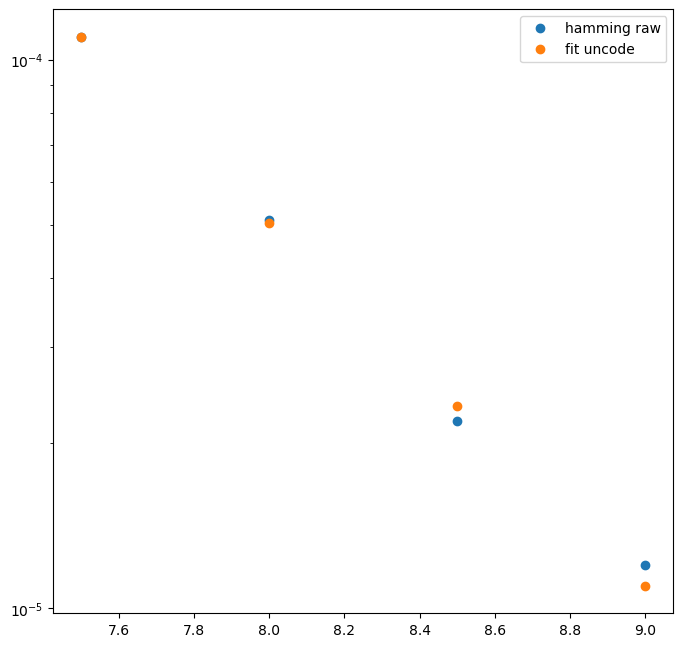

In [315]:
e=10
def exp_1(x,a,b,c,d):
    return a*e**((-((x*b)**c))/d)
param, param_cov = curve_fit(exp_1,ebno[-5:-1],Hammingcode74[16:20], maxfev = int(1e7))

exp_fun = param[0]*(e)**((-((ebno[-5:-1]*param[1])**param[2]))/param[3])
figure(figsize=(8, 8), dpi=100)

#uncode plot
plt.plot(ebno[-5:-1],Hammingcode74[16:20],'o',label='hamming raw')
plt.plot(ebno[-5:-1],exp_fun,'o',label='fit uncode')
plt.legend()
plt.yscale('log')

<ipython-input-362-99bb4a2ad643>:8: RuntimeWarning: invalid value encountered in power
  return a*e**((-((x*b)**c))/d)
<ipython-input-362-99bb4a2ad643>:15: RuntimeWarning: invalid value encountered in power
  return a1*hamming_variable**((-((x*a2)**a3))/a4)+a5*hamming_variable**((-((x*a6)**a6))/a8)+a9*hamming_variable**((-((x*a10)**a11))/a12)
<ipython-input-362-99bb4a2ad643>:15: RuntimeWarning: overflow encountered in power
  return a1*hamming_variable**((-((x*a2)**a3))/a4)+a5*hamming_variable**((-((x*a6)**a6))/a8)+a9*hamming_variable**((-((x*a10)**a11))/a12)
<ipython-input-362-99bb4a2ad643>:15: RuntimeWarning: divide by zero encountered in power
  return a1*hamming_variable**((-((x*a2)**a3))/a4)+a5*hamming_variable**((-((x*a6)**a6))/a8)+a9*hamming_variable**((-((x*a10)**a11))/a12)
c:\Users\E411_71\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be est

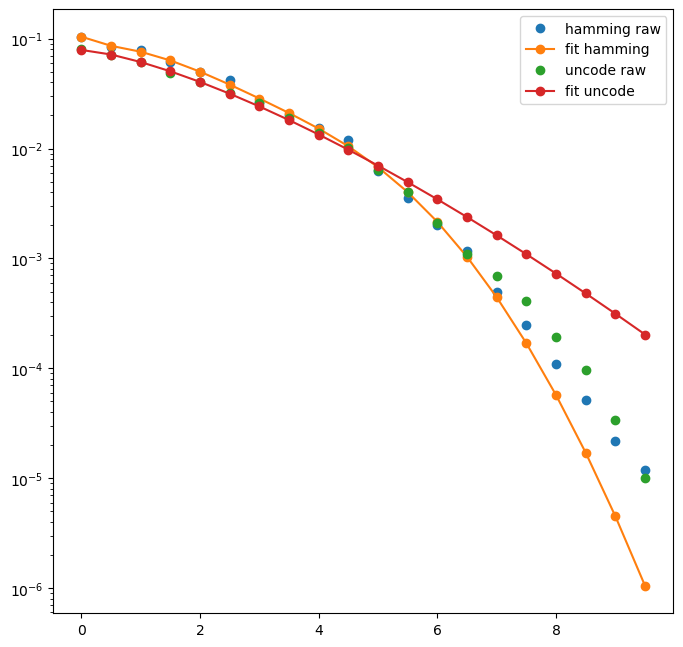

In [362]:
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import math
from matplotlib.pyplot import figure

e=2.718
def exp_1(x,a,b,c,d):
    return a*e**((-((x*b)**c))/d)
param, param_cov = curve_fit(exp_1,ebno,uncode[0:20], maxfev = int(1e7))
exp_fun = param[0]*(e)**((-((ebno*param[1])**param[2]))/param[3])

hamming_variable=7

def exp_hamming(x,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12):
    return a1*hamming_variable**((-((x*a2)**a3))/a4)+a5*hamming_variable**((-((x*a6)**a6))/a8)+a9*hamming_variable**((-((x*a10)**a11))/a12)
param, param_cov = curve_fit(exp_hamming,ebno,Hammingcode74[0:20], maxfev = int(1e7))
exp_haming_fun = param[0]*(hamming_variable)**((-((ebno*param[1])**param[2]))/param[3])+\
        param[4]*(hamming_variable)**((-((ebno*param[5])**param[6]))/param[7])+\
            param[8]*(hamming_variable)**((-((ebno*param[9])**param[10]))/param[11])


figure(figsize=(8, 8), dpi=100)
#hamming74 plot
plt.plot(ebno,Hammingcode74[0:20],'o',label='hamming raw')
plt.plot(ebno,exp_haming_fun,'-o',label='fit hamming')

#uncode plot
plt.plot(ebno,uncode[0:20],'o',label='uncode raw')
plt.plot(ebno,exp_fun,'-o',label='fit uncode')
plt.legend()
plt.yscale('log')

In [524]:
np.power(2,4)

16

In [527]:
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import math
from matplotlib.pyplot import figure





def exp_hamming(x,a1,a2,a3,a4):
    return a1*np.exp(-a2*np.power(x-a3,a4))
param, param_cov = curve_fit(exp_hamming,ebno,Hammingcode74[0:20], maxfev = int(1e8))

exp_haming_fun = param[0]*np.exp(- param[1]*np.power(ebno- param[2], param[3]))
figure(figsize=(8, 8), dpi=100)
#hamming74 plot
plt.plot(ebno,Hammingcode74[0:20],'o',label='hamming raw')
plt.plot(ebno,exp_haming_fun,'-o',label='fit hamming')

plt.legend()
plt.yscale('log')

<ipython-input-527-a61fff8f1f71>:11: RuntimeWarning: invalid value encountered in power
  return a1*np.exp(-a2*np.power(x-a3,a4))


KeyboardInterrupt: 

<ipython-input-520-d6b8a5dbbd9d>:13: RuntimeWarning: invalid value encountered in power
  return a1*hamming_variable**((-((x*a2)**a3))/a4)+a5*hamming_variabl2**((-((x*a6)**a6))/a8)+a9*hamming_variabl3**((-((x*a10)**a11))/a12)+a13*hamming_variable**((-((x*a14)**a15))/a16)
<ipython-input-520-d6b8a5dbbd9d>:13: RuntimeWarning: divide by zero encountered in power
  return a1*hamming_variable**((-((x*a2)**a3))/a4)+a5*hamming_variabl2**((-((x*a6)**a6))/a8)+a9*hamming_variabl3**((-((x*a10)**a11))/a12)+a13*hamming_variable**((-((x*a14)**a15))/a16)
c:\Users\E411_71\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-520-d6b8a5dbbd9d>:15: RuntimeWarning: divide by zero encountered in power
  exp_haming_fun = param[0]*(hamming_variable)**((-((ebno*param[1])**param[2]))/param[3])+\
<ipython-input-520-d6b8a5dbbd9d>:18: RuntimeWarning: divid

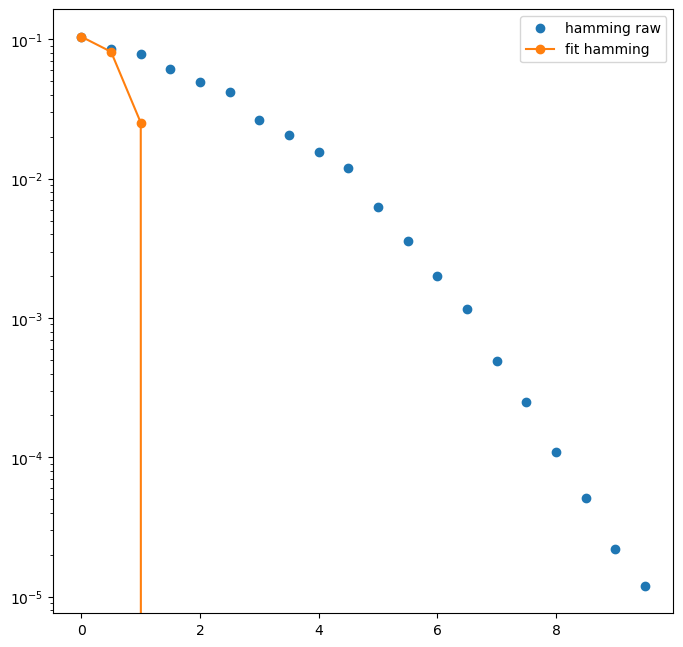

In [520]:
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import math
from matplotlib.pyplot import figure



hamming_variable=18
hamming_variabl2=8
hamming_variabl3=5

def exp_hamming(x,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16):
    return a1*hamming_variable**((-((x*a2)**a3))/a4)+a5*hamming_variabl2**((-((x*a6)**a6))/a8)+a9*hamming_variabl3**((-((x*a10)**a11))/a12)+a13*hamming_variable**((-((x*a14)**a15))/a16)
param, param_cov = curve_fit(exp_hamming,ebno,Hammingcode74[0:20], maxfev = int(1e7))
exp_haming_fun = param[0]*(hamming_variable)**((-((ebno*param[1])**param[2]))/param[3])+\
        param[4]*(hamming_variabl2)**((-((ebno*param[5])**param[6]))/param[7])+\
            param[8]*(hamming_variabl3)**((-((ebno*param[9])**param[10]))/param[11])+\
                param[12]*(hamming_variable)**((-((ebno*param[13])**param[14]))/param[15])

figure(figsize=(8, 8), dpi=100)
#hamming74 plot
plt.plot(ebno,Hammingcode74[0:20],'o',label='hamming raw')
plt.plot(ebno,exp_haming_fun,'-o',label='fit hamming')


plt.legend()
plt.yscale('log')

In [697]:
result_2d = np.asarray([[0.855, 0.855, 0.855, 0.855, 0.855, 0.855, 0.855, 0.855, 0.855,
        0.855, 0.855],
       [0.854, 0.852, 0.849, 0.847, 0.843, 0.838, 0.829, 0.842, 0.828,
        0.814, 0.811],
       [0.855, 0.847, 0.839, 0.84 , 0.831, 0.827, 0.818, 0.8  , 0.805,
        0.785, 0.775],
       [0.855, 0.843, 0.84 , 0.825, 0.815, 0.797, 0.789, 0.784, 0.761,
        0.757, 0.756],
       [0.854, 0.846, 0.833, 0.822, 0.805, 0.787, 0.775, 0.766, 0.733,
        0.722, 0.696],
       [0.852, 0.842, 0.823, 0.796, 0.785, 0.763, 0.752, 0.734, 0.706,
        0.692, 0.675],
       [0.851, 0.844, 0.817, 0.787, 0.765, 0.756, 0.724, 0.717, 0.691,
        0.661, 0.654],
       [0.852, 0.836, 0.806, 0.774, 0.758, 0.733, 0.707, 0.683, 0.648,
        0.653, 0.627],
       [0.852, 0.83 , 0.802, 0.779, 0.732, 0.701, 0.685, 0.662, 0.626,
        0.608, 0.614]])